In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import keras
import warnings
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.models import Sequential
from keras.layers import Dense


In [40]:
df = pd.read_csv('heart303.csv')
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


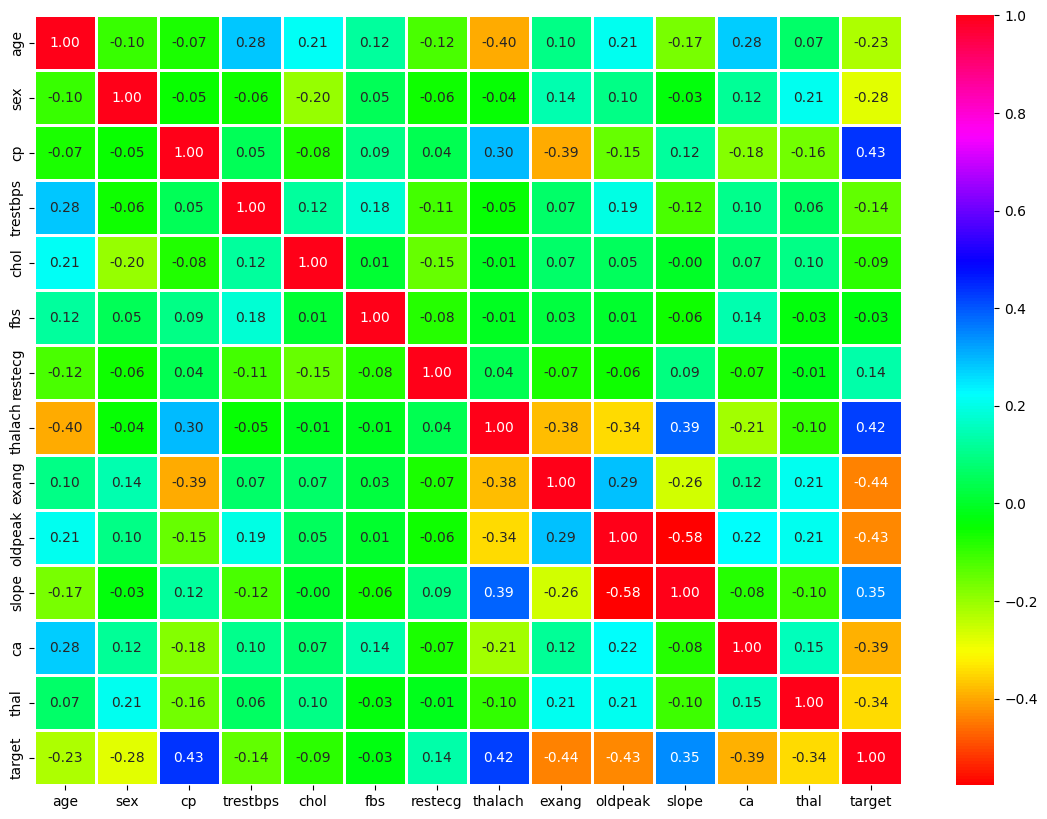

In [41]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True,cmap='hsv',fmt='.2f',linewidths=2)
plt.show()


In [42]:
# Preparação dos dados - Criação das variáveis dummies (binárias) quando são categóricas ou ordinais
# variável chest_pain para variáveis binárias cp_1, cp2, cp3
chest_pain=pd.get_dummies(df['cp'],prefix='cp',drop_first=True)
df=pd.concat([df,chest_pain],axis=1)
df.drop(['cp'],axis=1,inplace=True)
df


,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_1,cp_2,cp_3
0,63,1,145,233,1,0,150,0,2.3,0,0,1,1,False,False,True
1,37,1,130,250,0,1,187,0,3.5,0,0,2,1,False,True,False
2,41,0,130,204,0,0,172,0,1.4,2,0,2,1,True,False,False
3,56,1,120,236,0,1,178,0,0.8,2,0,2,1,True,False,False
4,57,0,120,354,0,1,163,1,0.6,2,0,2,1,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,1,123,1,0.2,1,0,3,0,False,False,False
299,45,1,110,264,0,1,132,0,1.2,1,0,3,0,False,False,True
300,68,1,144,193,1,1,141,0,3.4,1,2,3,0,False,False,False
301,57,1,130,131,0,1,115,1,1.2,1,1,3,0,False,False,False


In [43]:
# processo semelhantes para as variáveis slope, thal, restecg
sp=pd.get_dummies(df['slope'],prefix='slope')
th=pd.get_dummies(df['thal'],prefix='thal')
rest_ecg=pd.get_dummies(df['restecg'],prefix='restecg')
frames=[df,sp,th,rest_ecg]
df=pd.concat(frames,axis=1)
df.drop(['slope','thal','restecg'],axis=1,inplace=True)
df


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,...,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3,restecg_0,restecg_1,restecg_2
0,63,1,145,233,1,150,0,2.3,0,1,...,True,False,False,False,True,False,False,True,False,False
1,37,1,130,250,0,187,0,3.5,0,1,...,True,False,False,False,False,True,False,False,True,False
2,41,0,130,204,0,172,0,1.4,0,1,...,False,False,True,False,False,True,False,True,False,False
3,56,1,120,236,0,178,0,0.8,0,1,...,False,False,True,False,False,True,False,False,True,False
4,57,0,120,354,0,163,1,0.6,0,1,...,False,False,True,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,0,0,...,False,True,False,False,False,False,True,False,True,False
299,45,1,110,264,0,132,0,1.2,0,0,...,False,True,False,False,False,False,True,False,True,False
300,68,1,144,193,1,141,0,3.4,2,0,...,False,True,False,False,False,False,True,False,True,False
301,57,1,130,131,0,115,1,1.2,1,0,...,False,True,False,False,False,False,True,False,True,False


In [44]:
# Preparação das variáveis dependentes (y) e variáveis preditoras (X)
X = df.drop(['target'], axis = 1)
y = df.target.values

In [45]:
# Separação das bases de treino e predição
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [46]:
# Criação do modelo de rede neural
classifier = Sequential()

In [47]:
# Camada de entrada e primeira camada escondida
classifier.add(Dense(units=11, activation = 'relu', input_dim = 22))

In [48]:
# segunda camada escondida
classifier.add(Dense(units=11, activation = 'relu'))

In [49]:
# camada de saída
classifier.add(Dense(units=1, activation = 'sigmoid'))

In [50]:
# configuração da rede neural (métodos e métricas)
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy', 'FalseNegatives', 'FalsePositives'])

In [51]:
# Aplicação na base de dados de treino
classifier.fit(X_train, y_train, batch_size = 10, epochs = 25)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).